In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def extract_features(df, chunk_size=10):
    n = len(df)
    chunk_len = n // chunk_size

    # Assign chunk labels
    chunk_id = df.index // chunk_len

    features = pd.DataFrame()

    for col in df.columns:
        p2p = df[col].groupby(chunk_id).apply(lambda x: x.max() - x.min())
        features[f"{col}_p2p"] = p2p.values

    return features


In [76]:
df0 = pd.read_csv("../data/IMS/1st_test/2003.11.24.22.37.32", sep="\t", header=None)
df1 = pd.read_csv("../data/IMS/1st_test/2003.11.24.22.47.32", sep="\t", header=None)
df2 = pd.read_csv("../data/IMS/1st_test/2003.11.24.22.57.32", sep="\t", header=None)


df = pd.concat([df0, df1], ignore_index=True)
df = pd.concat([df, df2], ignore_index=True)


x = np.sqrt(df.iloc[:,0]**2 + df.iloc[:,1]**2)

features = extract_features(df, chunk_size=3)

In [77]:
features.head(20)

,0_p2p,1_p2p,2_p2p,3_p2p,4_p2p,5_p2p,6_p2p,7_p2p
0,1.135,1.321,0.894,0.811,1.734,1.980,1.418,1.472
1,1.211,0.996,0.933,0.808,1.956,1.546,1.435,1.433
2,1.097,0.981,0.877,0.799,2.326,1.924,1.475,1.728


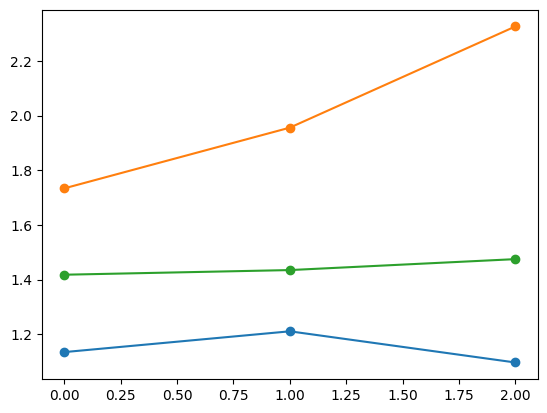

In [78]:
plt.plot(features.iloc[:,0], "-o")
plt.plot(features.iloc[:,4], "-o")
plt.plot(features.iloc[:,6], "-o")

plt.show()

In [79]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs 
    normal_cutoff = cutoff / nyquist  
    b, a = butter(order, normal_cutoff, btype='low', analog=False) 
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)
    return filtfilt(b, a, data) 


fs = 20e3
cutoff = 50

In [80]:
df_filtered = pd.DataFrame()
for col in df.columns:
    df_filtered[col] = butter_lowpass_filter(df[col], cutoff, fs)

In [81]:
features.head(20)

,0_p2p,1_p2p,2_p2p,3_p2p,4_p2p,5_p2p,6_p2p,7_p2p
0,1.135,1.321,0.894,0.811,1.734,1.980,1.418,1.472
1,1.211,0.996,0.933,0.808,1.956,1.546,1.435,1.433
2,1.097,0.981,0.877,0.799,2.326,1.924,1.475,1.728


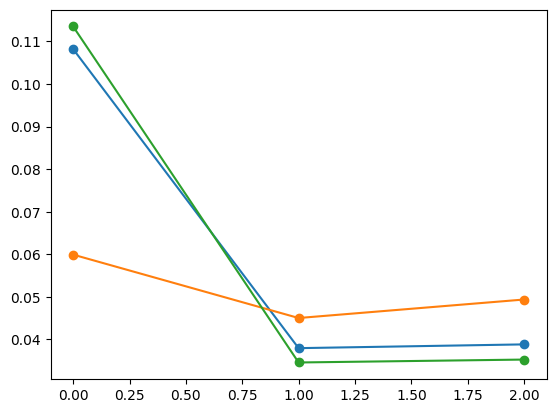

In [82]:
features = extract_features(df_filtered, chunk_size=3)

plt.plot(features.iloc[:,0], "-o")
plt.plot(features.iloc[:,4], "-o")
plt.plot(features.iloc[:,6], "-o")

plt.show()


In [112]:
# Create datasets

# Healthy Bearing 1,2


# Inner race Bearing 3:4/5


# Roller element 4: 3.25/5

path = "../data/IMS/1st_test/"

filenames = []

for (root, _, files) in os.walk(path):
    for file in files:
        if "2003" in file:
            filenames.append(os.path.join(root,file)) 

filenames.sort()


data_channels = ["Bearing 1 - Ch 1", "Bearing 1 - Ch 2",
                 "Bearing 2 - Ch 1", "Bearing 2 - Ch 2",
                 "Bearing 3 - Ch 1", "Bearing 3 - Ch 2",
                 "Bearing 4 - Ch 1", "Bearing 4 - Ch 2"]

df_healthy       = pd.DataFrame()
df_inner_defect  = pd.DataFrame()
df_roller_defect = pd.DataFrame()
df               = pd.DataFrame()

# chunk_size = 10
i = 0
for file in filenames[len(filenames) - len(filenames)//3:]:
    print(f"parsing file {i} of {len(filenames)//3}")
    df_temp = pd.read_csv(file, sep="\t", header=None)
    
    df_healthy       = pd.concat([df_healthy      , df_temp.iloc[:, 0]], ignore_index=True)
    df_inner_defect  = pd.concat([df_inner_defect , df_temp.iloc[:, 4]], ignore_index=True)
    df_roller_defect = pd.concat([df_roller_defect, df_temp.iloc[:, 6]], ignore_index=True)
    i = i + 1
    
# df.to_csv("mean values of data", mode="a", header=False, index=False) 



parsing file 0 of 718
parsing file 1 of 718
parsing file 2 of 718
parsing file 3 of 718
parsing file 4 of 718
parsing file 5 of 718
parsing file 6 of 718
parsing file 7 of 718
parsing file 8 of 718
parsing file 9 of 718
parsing file 10 of 718
parsing file 11 of 718
parsing file 12 of 718
parsing file 13 of 718
parsing file 14 of 718
parsing file 15 of 718
parsing file 16 of 718
parsing file 17 of 718
parsing file 18 of 718
parsing file 19 of 718
parsing file 20 of 718
parsing file 21 of 718
parsing file 22 of 718
parsing file 23 of 718
parsing file 24 of 718
parsing file 25 of 718
parsing file 26 of 718
parsing file 27 of 718
parsing file 28 of 718
parsing file 29 of 718
parsing file 30 of 718
parsing file 31 of 718
parsing file 32 of 718
parsing file 33 of 718
parsing file 34 of 718
parsing file 35 of 718
parsing file 36 of 718
parsing file 37 of 718
parsing file 38 of 718
parsing file 39 of 718
parsing file 40 of 718
parsing file 41 of 718
parsing file 42 of 718
parsing file 43 of 71

(-5.0, 4.998)

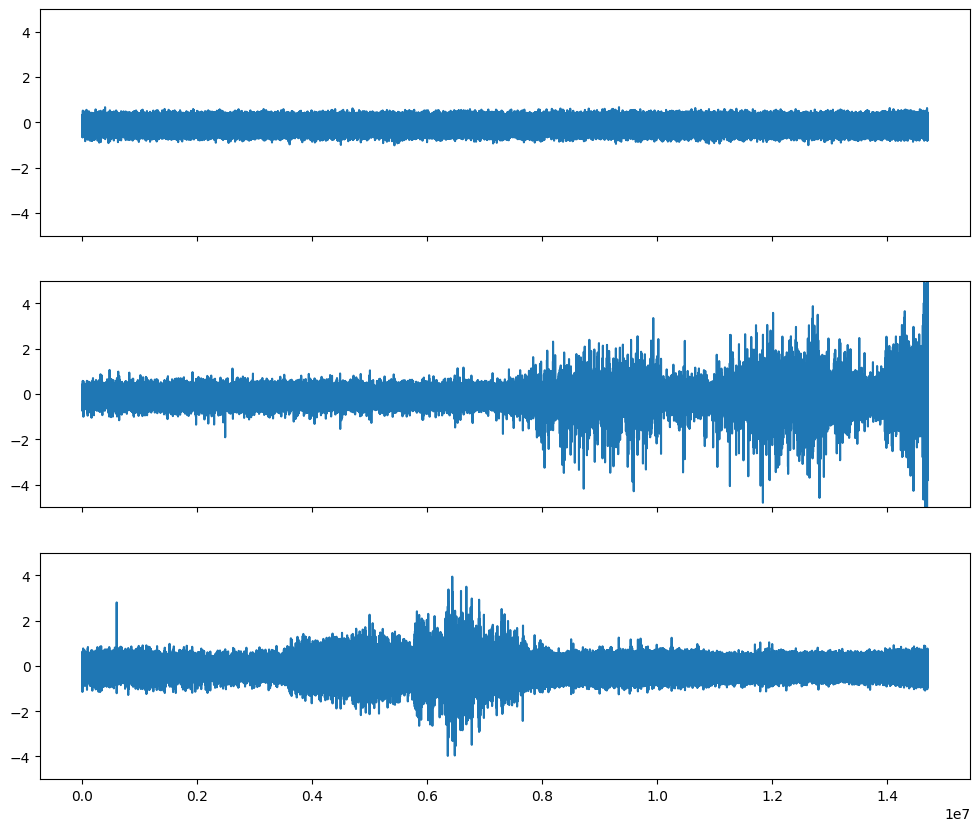

In [113]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# axes = axes.ravel()  # flatten to easy 1D indexing

y_min = df_inner_defect.min().min()
y_max = df_inner_defect.max().max()



axes[0].plot(df_healthy)
axes[0].set_ylim(y_min, y_max)

axes[1].plot(df_inner_defect)
axes[1].set_ylim(y_min, y_max)

axes[2].plot(df_roller_defect)
axes[2].set_ylim(y_min, y_max)
#plt.plot(df_healthy)

In [139]:
length = len(df_healthy) // 2

df_healthy0       = df_healthy.iloc[length:].reset_index(drop=True)
df_inner_defect0  = df_inner_defect.iloc[length:].reset_index(drop=True)
df_roller_defect0 = df_roller_defect.iloc[length // 3 : length + length // 3].reset_index(drop=True)



(-5.0, 4.998)

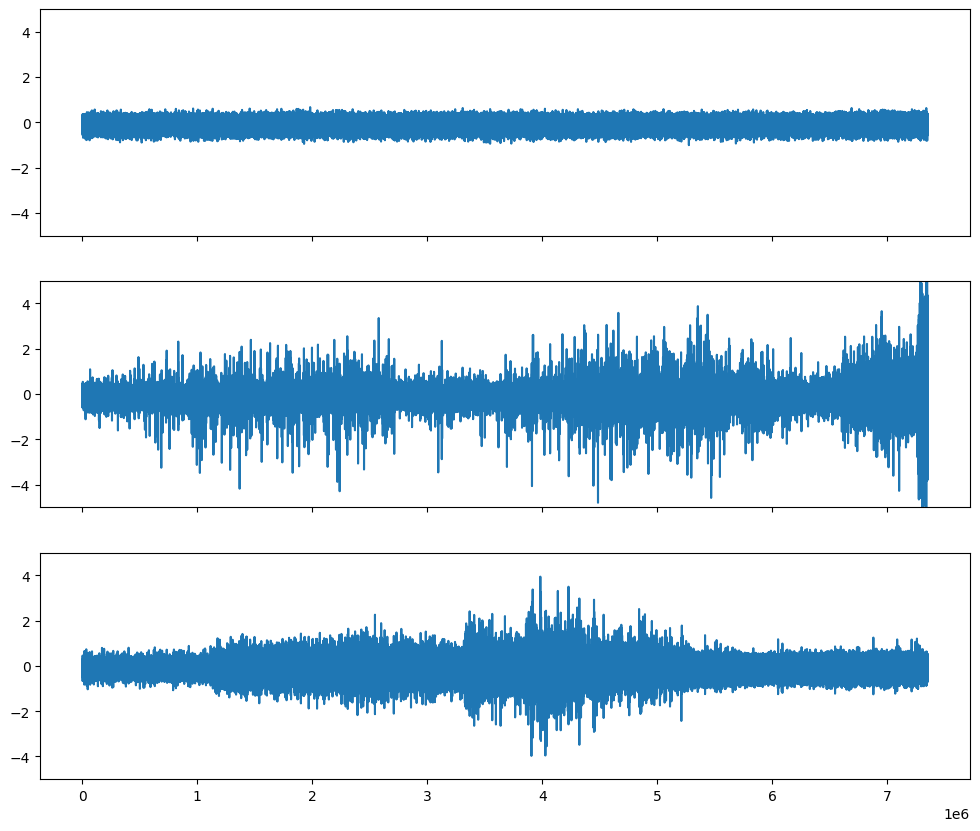

In [140]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
# axes = axes.ravel()  # flatten to easy 1D indexing

y_min = df_inner_defect.min().min()
y_max = df_inner_defect.max().max()



axes[0].plot(df_healthy0)
axes[0].set_ylim(y_min, y_max)

axes[1].plot(df_inner_defect0)
axes[1].set_ylim(y_min, y_max)

axes[2].plot(df_roller_defect0)
axes[2].set_ylim(y_min, y_max)
#plt.plot(df_healthy)

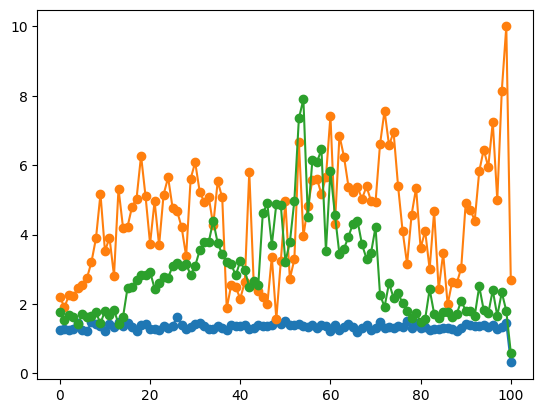

In [150]:

df = pd.concat([df_healthy0, df_inner_defect0, df_roller_defect0], axis=1)

df.columns = [
    "Healthy", "Inner Race Defect", "Roller Element Defect"
]

df.head()

features = extract_features(df, 100)

plt.plot(features.iloc[:,0], "-o")
plt.plot(features.iloc[:,1], "-o")
plt.plot(features.iloc[:,2], "-o")

plt.show()